In [ ]:
!pip install imblearn xgboost -q

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Carregar dataset da máquina
df = pd.read_csv("/content/bank-additional-full.csv", sep=";")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:

# Remover colunas desnecessárias e que podem causar vazamento
cols_drop = ['duration', 'pdays', 'previous', 'contact']
df = df.drop(columns=cols_drop)




In [ ]:
df.info()
df.describe()
df['y'].value_counts()

# verificar
display(df.head())
print(df.shape)
print(df['y'].value_counts())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   campaign        41188 non-null  int64  
 10  poutcome        41188 non-null  object 
 11  emp.var.rate    41188 non-null  float64
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  object 
dtypes: float64(5), int64(2), object

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


(41188, 17)
y
no     36548
yes     4640
Name: count, dtype: int64


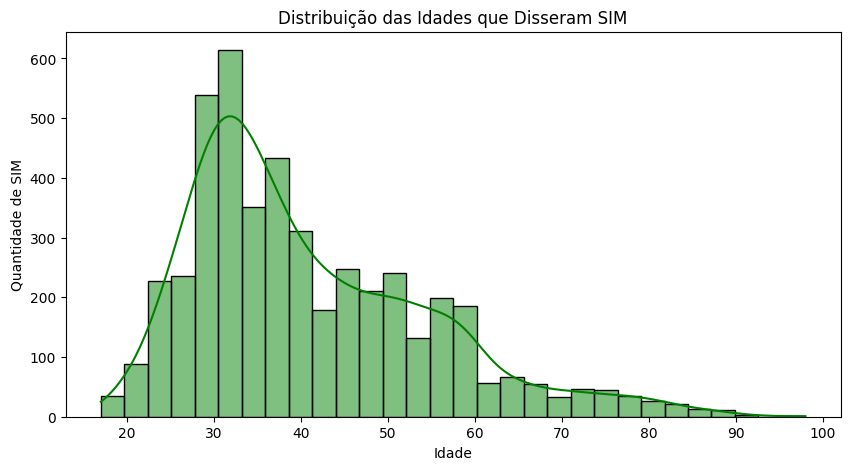

In [ ]:
# Distribuição por IDADE

plt.figure(figsize=(10,5))
sns.histplot(df[df['y'] == 'yes']['age'], bins=30, kde=True, color='green')
plt.title("Distribuição das Idades que Disseram SIM")
plt.xlabel("Idade")
plt.ylabel("Quantidade de SIM")
plt.show()



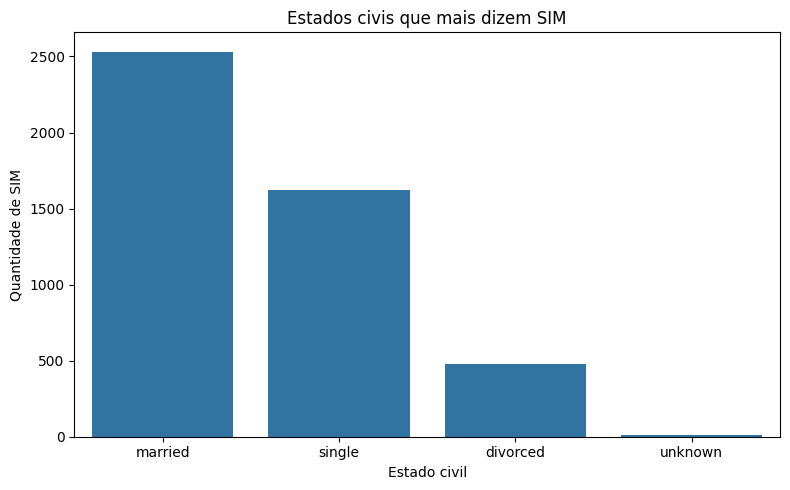

In [ ]:
# Distribuição por Estado Civil
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Agrupa estado civil apenas para casos onde y = "yes"
estado_sim = df[df['y'] == 'yes']['marital'].value_counts()

sns.barplot(x=estado_sim.index, y=estado_sim.values)

plt.title("Estados civis que mais dizem SIM")
plt.xlabel("Estado civil")
plt.ylabel("Quantidade de SIM")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



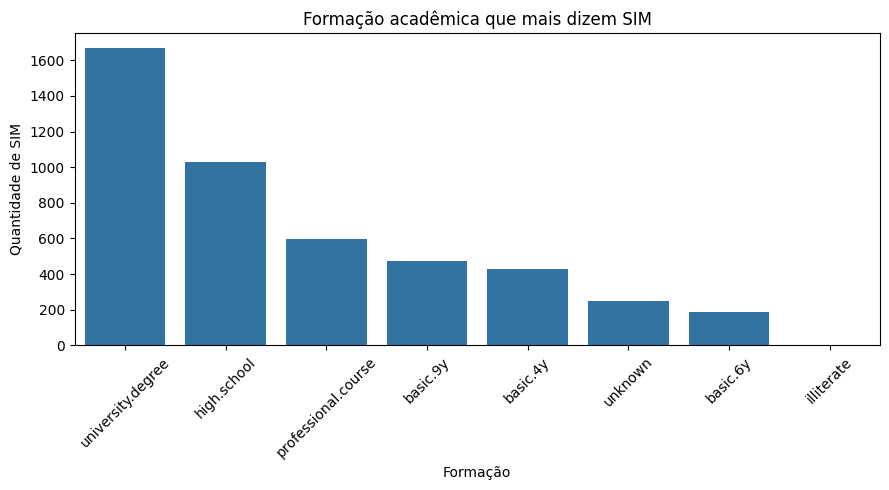

In [ ]:
# Distribuição por Formação
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,5))

# Filtrar apenas quem disse "yes" e contar formações
formacao_sim = df[df['y'] == 'yes']['education'].value_counts()

sns.barplot(x=formacao_sim.index, y=formacao_sim.values)

plt.title("Formação acadêmica que mais dizem SIM")
plt.xlabel("Formação")
plt.ylabel("Quantidade de SIM")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



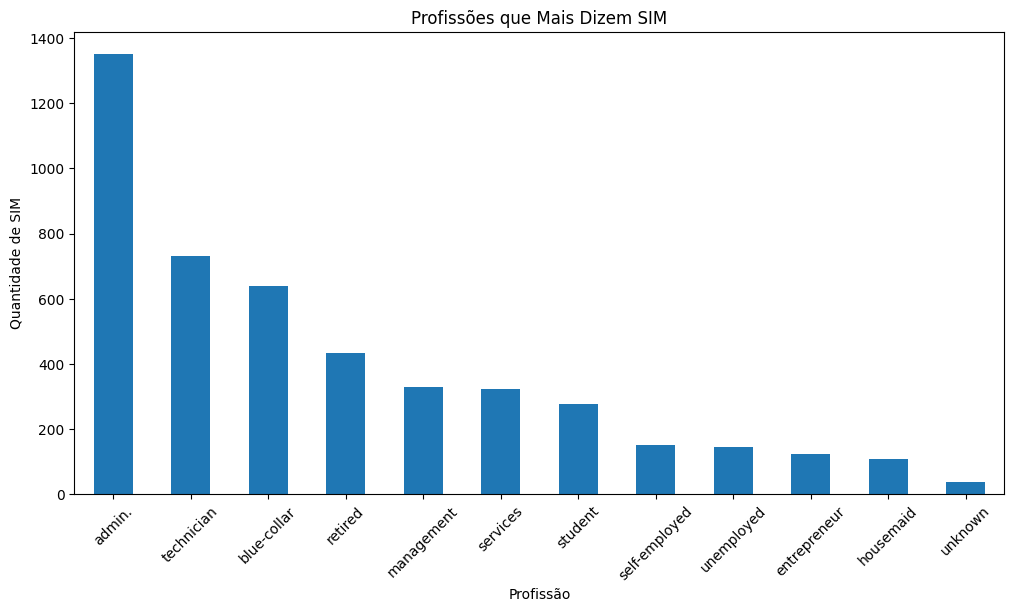

In [ ]:
#Profissões que mais dizem SIM
plt.figure(figsize=(12,6))
df[df['y'] == 'yes']['job'].value_counts().plot(kind='bar')
plt.title("Profissões que Mais Dizem SIM")
plt.xlabel("Profissão")
plt.ylabel("Quantidade de SIM")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Pré processamento (converter categóricas em numérics)
# one-hot encoding via get_dummies
df_encoded = pd.get_dummies(df, drop_first=True)

# Definir X e y (entrada e saida)
X = df_encoded.drop("y_yes", axis=1)
y = df_encoded["y_yes"]

# Salvar lista de colunas para uso futuro (essencial para previsões com novos dados)
feature_columns = X.columns.tolist()

print("Features:", len(feature_columns))
X.shape, y.shape



Features: 49


((41188, 49), (41188,))

In [ ]:
#  split, SMOTE no treino, depois fit do scaler no X_train_resampled


RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y
)

# SMOTE apenas no conjunto de treino
sm = SMOTE(random_state=RANDOM_STATE)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Distribuição após SMOTE (treino):")
print(y_train_res.value_counts())

# Padronização: fit no treino resample, transform no teste
smt = StandardScaler()
X_train_scaled = smt.fit_transform(X_train_res)
X_test_scaled = smt.transform(X_test)

# Opção: transformar X_train_res e X_test em DataFrames com colunas originais (útil p/ debug e reindex)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_columns)


Distribuição após SMOTE (treino):
y_yes
False    25583
True     25583
Name: count, dtype: int64


Treinando LogisticRegression ...

Modelo: LogisticRegression
              precision    recall  f1-score   support

       False       0.93      0.90      0.91     10965
        True       0.35      0.43      0.39      1392

    accuracy                           0.85     12357
   macro avg       0.64      0.67      0.65     12357
weighted avg       0.86      0.85      0.85     12357



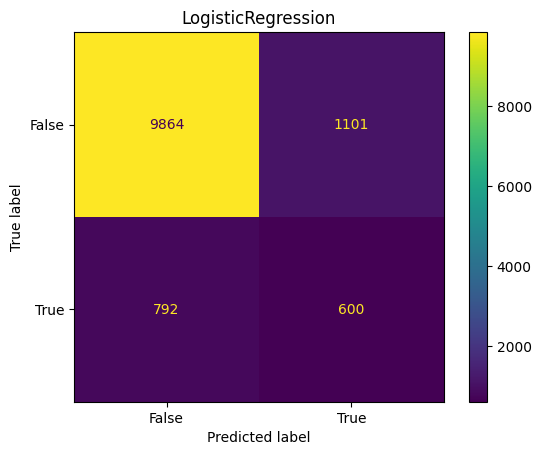

Treinando NaiveBayes ...

Modelo: NaiveBayes
              precision    recall  f1-score   support

       False       0.95      0.58      0.72     10965
        True       0.19      0.78      0.31      1392

    accuracy                           0.60     12357
   macro avg       0.57      0.68      0.52     12357
weighted avg       0.87      0.60      0.68     12357



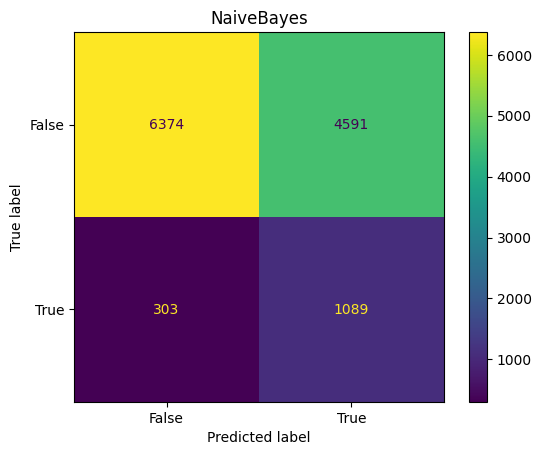

Treinando SVM ...

Modelo: SVM
              precision    recall  f1-score   support

       False       0.93      0.94      0.93     10965
        True       0.47      0.41      0.44      1392

    accuracy                           0.88     12357
   macro avg       0.70      0.68      0.69     12357
weighted avg       0.88      0.88      0.88     12357



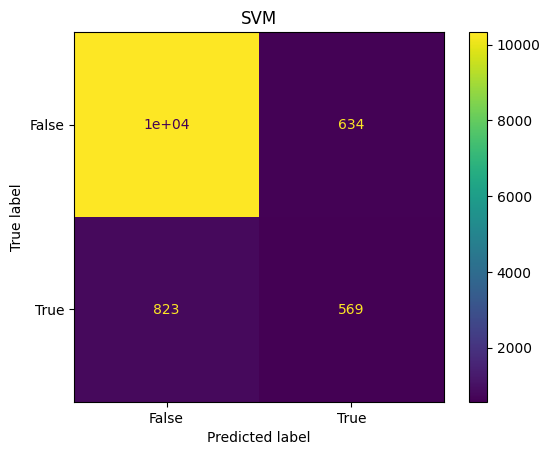

Treinando XGBoost ...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:30:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Modelo: XGBoost
              precision    recall  f1-score   support

       False       0.92      0.95      0.94     10965
        True       0.49      0.39      0.44      1392

    accuracy                           0.89     12357
   macro avg       0.71      0.67      0.69     12357
weighted avg       0.88      0.89      0.88     12357



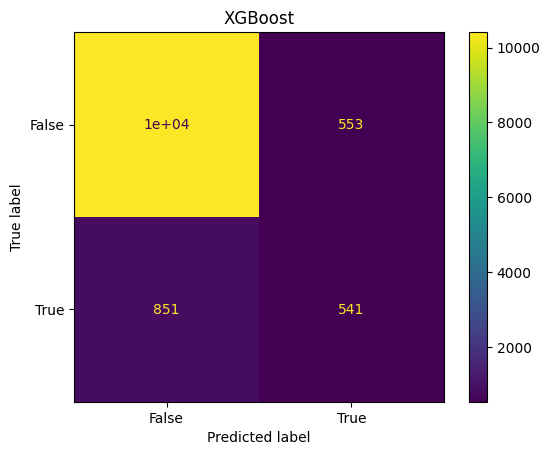

,Model,Precision_1,Recall_1,F1-Score_1,Accuracy
0,SVM,0.472984,0.408764,0.438536,0.882091
1,XGBoost,0.494516,0.388649,0.435237,0.886380
2,LogisticRegression,0.352734,0.431034,0.387973,0.846807
3,NaiveBayes,0.191725,0.782328,0.307975,0.603949



Melhor modelo (por F1-Score da classe 1):


,0
Model,SVM
Precision_1,0.472984
Recall_1,0.408764
F1-Score_1,0.438536
Accuracy,0.882091


In [ ]:
# treinar e avaliar modelos (todos usam X_train_scaled / X_test_scaled)
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    'NaiveBayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=RANDOM_STATE),
    'XGBoost': XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=RANDOM_STATE)
}

all_model_metrics = []

def avaliar_modelo(modelo, Xtr, ytr, Xte, yte, nome):
    modelo.fit(Xtr, ytr)
    pred = modelo.predict(Xte)
    print("\n==============================")
    print(f"Modelo: {nome}")
    print("==============================")
    print(classification_report(yte, pred))
    ConfusionMatrixDisplay.from_predictions(yte, pred)
    plt.title(nome)
    plt.show()

    report = classification_report(yte, pred, output_dict=True)
    # Obter métricas da classe positiva (label 'True' para booleanos)
    true_class_metrics = report['True']
    accuracy = report['accuracy']

    metrics = {
        'Model': nome,
        'Precision_1': true_class_metrics['precision'],
        'Recall_1': true_class_metrics['recall'],
        'F1-Score_1': true_class_metrics['f1-score'],
        'Accuracy': accuracy
    }
    all_model_metrics.append(metrics)
    return modelo  # retorna o modelo treinado caso queira reusar

# Treinar todos e armazenar modelos treinados
trained_models = {}
for name, mdl in models.items():
    print(f"Treinando {name} ...")
    trained = avaliar_modelo(mdl, X_train_scaled, y_train_res, X_test_scaled, y_test, name)
    trained_models[name] = trained

# Comparar métricas
metrics_df = pd.DataFrame(all_model_metrics).sort_values(by='F1-Score_1', ascending=False).reset_index(drop=True)
display(metrics_df)
print("\nMelhor modelo (por F1-Score da classe 1):")
display(metrics_df.loc[0])


In [ ]:
# Comparação das Métricas
metrics_df = pd.DataFrame(all_model_metrics)
print("\nComparação das métricas dos Modelos:")
print(metrics_df)

#imprima o melhor modelo
print("\nMelhor modelo:")
print(metrics_df.loc[metrics_df['F1-Score_1'].idxmax()])


Comparação das métricas dos Modelos:
                Model  Precision_1  Recall_1  F1-Score_1  Accuracy
0  LogisticRegression     0.352734  0.431034    0.387973  0.846807
1          NaiveBayes     0.191725  0.782328    0.307975  0.603949
2                 SVM     0.472984  0.408764    0.438536  0.882091
3             XGBoost     0.494516  0.388649    0.435237  0.886380

Melhor modelo:
Model               SVM
Precision_1    0.472984
Recall_1       0.408764
F1-Score_1     0.438536
Accuracy       0.882091
Name: 2, dtype: object


In [ ]:
# Pipeline e salvamento do melhor modelo

import joblib

melhor_modelo = trained_models['SVM']
scaler = smt

joblib.dump({
    'model': melhor_modelo,
    'scaler': scaler,
    'features': feature_columns
}, 'best_model_pipeline.pkl')

print("Pipeline completo salvo em 'best_model_pipeline.pkl'!")

Pipeline completo salvo em 'best_model_pipeline.pkl'!


In [ ]:
# Carregar e usar para novas previsões

Pipeline = joblib.load('best_model_pipeline.pkl')

# Exemplo de novo registro. SUBSTITUA COM OS DADOS REAIS DO NOVO CLIENTE.
novo_registro = {
    'age': 40,
    'campaign': 2,
    'emp.var.rate': 1.1,
    'cons.price.idx': 93.994,
    'cons.conf.idx': -36.4,
    'euribor3m': 4.857,
    'nr.employed': 5191.0,
    'job': 'admin.',
    'marital': 'married',
    'education': 'university.degree',
    'default': 'no',
    'housing': 'yes',
    'loan': 'no',
    'month': 'may',
    'day_of_week': 'mon',
    'poutcome': 'nonexistent'
}

X_novo = pd.DataFrame([novo_registro])  # registro novo como dicionário
X_novo_encoded = pd.get_dummies(X_novo).reindex(columns=Pipeline['features'], fill_value=0)
X_novo_scaled = Pipeline['scaler'].transform(X_novo_encoded)
pred = Pipeline['model'].predict(X_novo_scaled)
print("Predição:", pred)

Predição: [False]


In [ ]:
import gradio as gr
print("Gradio imported as gr.")

Gradio imported as gr.


Usamos `gr.Number` para entradas numéricas e `gr.Dropdown` para entradas categóricas.


In [ ]:
gr_inputs = [
    gr.Number(label='Idade', value=df['age'].mean()),
    gr.Dropdown(label='Profissão', choices=df['job'].unique().tolist(), value='admin.'),
    gr.Dropdown(label='Estado Civil', choices=df['marital'].unique().tolist(), value='married'),
    gr.Dropdown(label='Escolaridade', choices=df['education'].unique().tolist(), value='university.degree'),
    gr.Dropdown(label='Inadimplente?', choices=df['default'].unique().tolist(), value='no'),
    gr.Dropdown(label='Tem Imóvel?', choices=df['housing'].unique().tolist(), value='yes'),
    gr.Dropdown(label='Tem Empréstimo?', choices=df['loan'].unique().tolist(), value='no'),
    gr.Dropdown(label='Mês', choices=df['month'].unique().tolist(), value='may'),
    gr.Dropdown(label='Dia da Semana', choices=df['day_of_week'].unique().tolist(), value='mon'),
    gr.Number(label='Número de Contatos na Campanha', value=df['campaign'].mean()),
    gr.Dropdown(label='Resultado da Campanha Anterior', choices=df['poutcome'].unique().tolist(), value='nonexistent'),


]

print("Gradio input components defined.")

Gradio input components defined.


In [ ]:
def predict_churn(age, job, marital, education, default, housing, loan, month, day_of_week, campaign, poutcome):
    # Criar um dicionário com os inputs
    new_data = {
        'age': age,
        'job': job,
        'marital': marital,
        'education': education,
        'default': default,
        'housing': housing,
        'loan': loan,
        'month': month,
        'day_of_week': day_of_week,
        'campaign': campaign,
        'poutcome': poutcome
    }

    # Converter para DataFrame de uma única linha
    X_new = pd.DataFrame([new_data])

    # Aplicar one-hot encoding
    X_new_encoded = pd.get_dummies(X_new)

    # Reindexar para ter as mesmas colunas e ordem que o conjunto de treino
    # Preencher colunas ausentes com 0
    X_new_encoded = X_new_encoded.reindex(columns=Pipeline['features'], fill_value=0)

    # Escalonar os dados usando o scaler salvo
    X_new_scaled = Pipeline['scaler'].transform(X_new_encoded)

    # Fazer a previsão
    prediction = Pipeline['model'].predict(X_new_scaled)

    # Traduzir a previsão para português
    if prediction[0]:
        return 'Sim (O cliente provavelmente irá aderir à campanha)'
    else:
        return 'Não (O cliente provavelmente NÃO irá aderir à campanha)'

print("Prediction function 'predict_churn' updated with poutcome.")

Prediction function 'predict_churn' updated with poutcome.


In [ ]:
iface = gr.Interface(
    fn=predict_churn,
    inputs=gr_inputs,
    outputs=gr.Label(),
    title="Previsão de Adesão à Campanha Bancária",
    description="Insira os dados do cliente para prever se ele irá aderir a uma campanha bancária."
)

iface.launch(debug=True, share=True)
print("Gradio interface launched.")

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://8ad74afdf73000a825.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
gr_inputs = [
    gr.Number(label='Idade', value=df['age'].mean()),
    gr.Dropdown(label='Profissão', choices=df['job'].unique().tolist(), value='admin.'),
    gr.Dropdown(label='Estado Civil', choices=df['marital'].unique().tolist(), value='married'),
    gr.Dropdown(label='Escolaridade', choices=df['education'].unique().tolist(), value='university.degree'),
    gr.Dropdown(label='Inadimplente?', choices=df['default'].unique().tolist(), value='no'),
    gr.Dropdown(label='Tem Imóvel?', choices=df['housing'].unique().tolist(), value='yes'),
    gr.Dropdown(label='Tem Empréstimo?', choices=df['loan'].unique().tolist(), value='no'),
    gr.Dropdown(label='Mês', choices=df['month'].unique().tolist(), value='may'),
    gr.Dropdown(label='Dia da Semana', choices=df['day_of_week'].unique().tolist(), value='mon'),
    gr.Number(label='Número de Contatos na Campanha', value=df['campaign'].mean()),
    gr.Dropdown(label='Resultado da Campanha Anterior', choices=df['poutcome'].unique().tolist(), value='nonexistent')
]

print("Gradio input components defined.")

iface = gr.Interface(
    fn=predict_churn,
    inputs=gr_inputs,
    outputs=gr.Label(),
    title="Previsão de Adesão à Campanha Bancária",
    description="Insira os dados do cliente para prever se ele irá aderir a uma campanha bancária."
)

iface.launch(debug=True, share=True)
print("Gradio interface launched.")

Gradio input components defined.
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d71ef3ca9082e4f2ea.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Created dataset file at: .gradio/flagged/dataset1.csv
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://54129f88e4ad9e82b3.gradio.live
Killing tunnel 127.0.0.1:7860 <> https://d71ef3ca9082e4f2ea.gradio.live
Gradio interface launched.
